In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gzmyksl6701","key":"1f4cb6116ff4f884c56f85fc195ce540"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d emmarex/plantdisease
!unzip -q plantdisease.zip -d plant_disease


Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 97% 637M/658M [00:00<00:00, 1.34GB/s]
100% 658M/658M [00:00<00:00, 1.33GB/s]


In [ ]:
!rm -r /content/plant_disease/plantvillage


In [ ]:
!kaggle datasets download -d ezzzio/random-images

Dataset URL: https://www.kaggle.com/datasets/ezzzio/random-images
License(s): GPL-2.0
  0% 0.00/31.7M [00:00<?, ?B/s]
100% 31.7M/31.7M [00:00<00:00, 1.21GB/s]


In [ ]:
!unzip -q random-images.zip -d unknown


In [ ]:
!mv /content/unknown/dataset/train/* /content/unknown/
!mv /content/unknown/dataset/test/* /content/unknown/

In [ ]:
!rm -r /content/unknown/dataset


In [ ]:
import os

dataset_path = "/content/plant_disease/PlantVillage"
class_dirs = os.listdir(dataset_path)

print(f"Total class amount: {len(class_dirs)}\n")

for class_name in class_dirs:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} images")


Total class amount: 15

Tomato_Bacterial_spot: 2127 images
Potato___Late_blight: 1000 images
Tomato__Target_Spot: 1404 images
Tomato_Early_blight: 1000 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
Pepper__bell___Bacterial_spot: 997 images
Tomato__Tomato_mosaic_virus: 373 images
Pepper__bell___healthy: 1478 images
Potato___healthy: 152 images
Tomato_Septoria_leaf_spot: 1771 images
Tomato_healthy: 1591 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 3209 images
Potato___Early_blight: 1000 images
Tomato_Late_blight: 1909 images
Tomato_Leaf_Mold: 952 images


In [ ]:
from fastai.vision.all import *
path = Path('/content/plant_disease/PlantVillage')

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms = aug_transforms(
    size=224,
    max_zoom=1.3,
    max_rotate=30,
    max_lighting=0.5,
    max_warp=0.3,
    flip_vert=True,
    p_affine=0.9,
    p_lighting=0.9
)

)

dls = dblock.dataloaders(path, bs=32)

# Kontrol
print("Classes:", dls.vocab)
print("Number of training samples:", len(dls.train_ds))
print("Number of validation samples:", len(dls.valid_ds))




Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Number of training samples: 16511
Number of validation samples: 4127


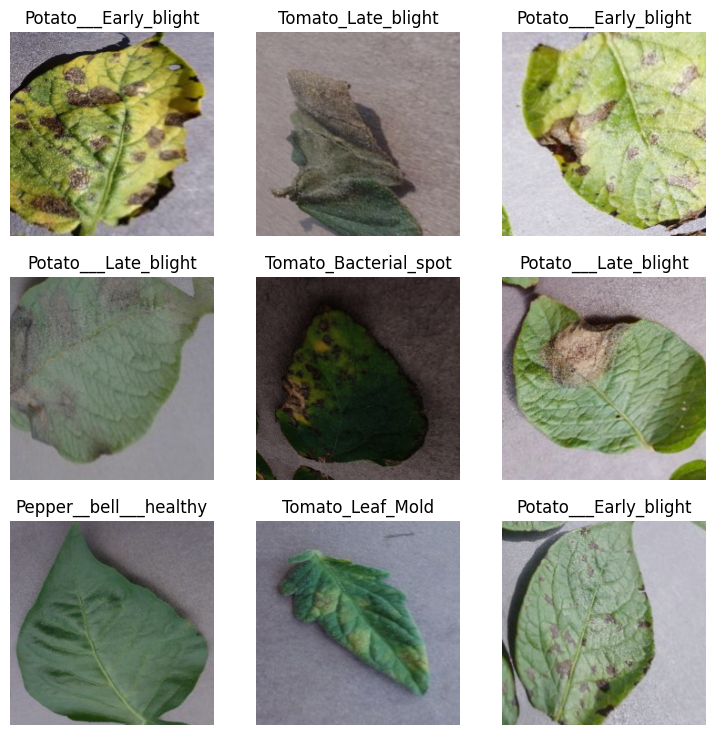

In [ ]:
dls.show_batch(max_n=9)

In [ ]:
dblock.summary(path)



Setting-up type transforms pipelines
Found 20638 items
2 datasets of sizes 16511,4127
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /content/plant_disease/PlantVillage/Tomato_Bacterial_spot/26768a91-4aca-41a4-ad88-1b791c2312dc___GCREC_Bact.Sp 5669.JPG
    applying PILBase.create gives
      PILImage mode=RGB size=256x256
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /content/plant_disease/PlantVillage/Tomato_Bacterial_spot/26768a91-4aca-41a4-ad88-1b791c2312dc___GCREC_Bact.Sp 5669.JPG
    applying parent_label gives
      Tomato_Bacterial_spot
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(5)

Final sample: (PILImage mode=RGB size=256x256, TensorCategory(5))


Found 20638 items
2 datasets of sizes 16511,4127
Se

In [ ]:
learn_resnet50 = vision_learner(dls, resnet50, metrics=accuracy)





Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 204MB/s]


In [ ]:
learn_resnet50.freeze()

SuggestedLRs(minimum=0.017378008365631102, steep=0.004365158267319202, valley=0.0014454397605732083, slide=0.004365158267319202)

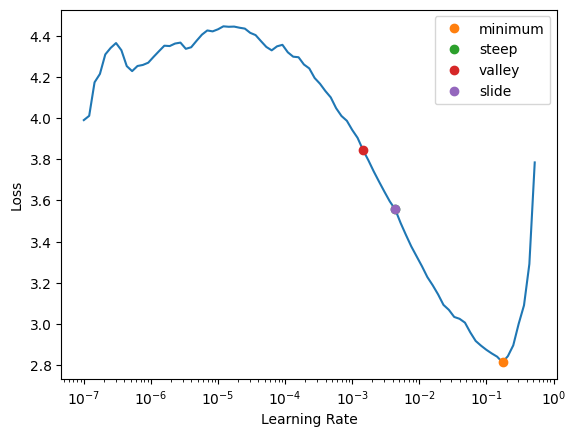

In [ ]:
learn_resnet50.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
learn_resnet50.fit_one_cycle(1, 2.51e-3)



In [ ]:
learn_resnet50.unfreeze()

SuggestedLRs(minimum=2.2908675418875645e-07, steep=7.585775847473997e-07, valley=7.585775892948732e-05, slide=9.120108734350652e-05)

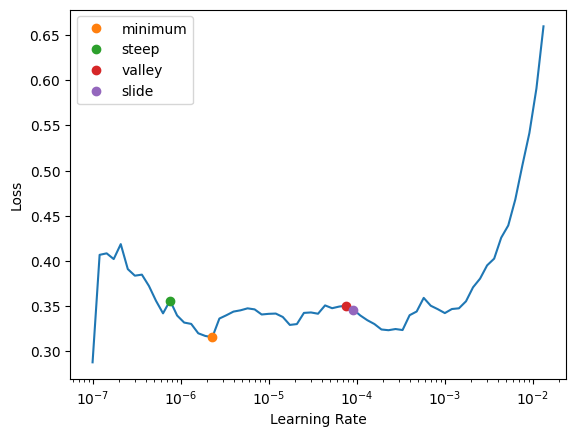

In [ ]:
learn_resnet50.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
learn_resnet50.fit_one_cycle(10, lr_max=slice(1e-6, 7.5e-5))




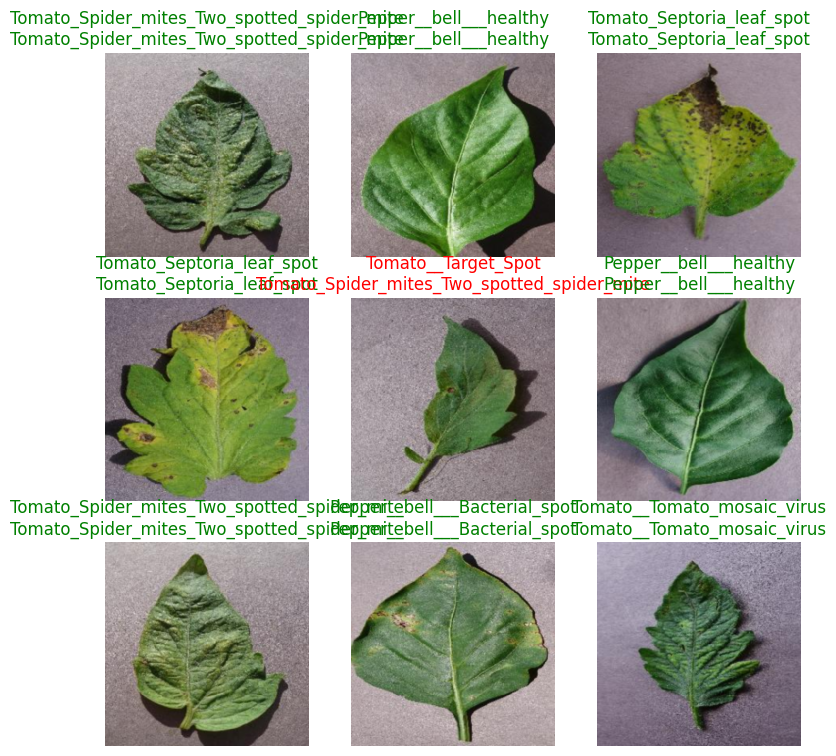

In [ ]:
learn_resnet50.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_resnet50)

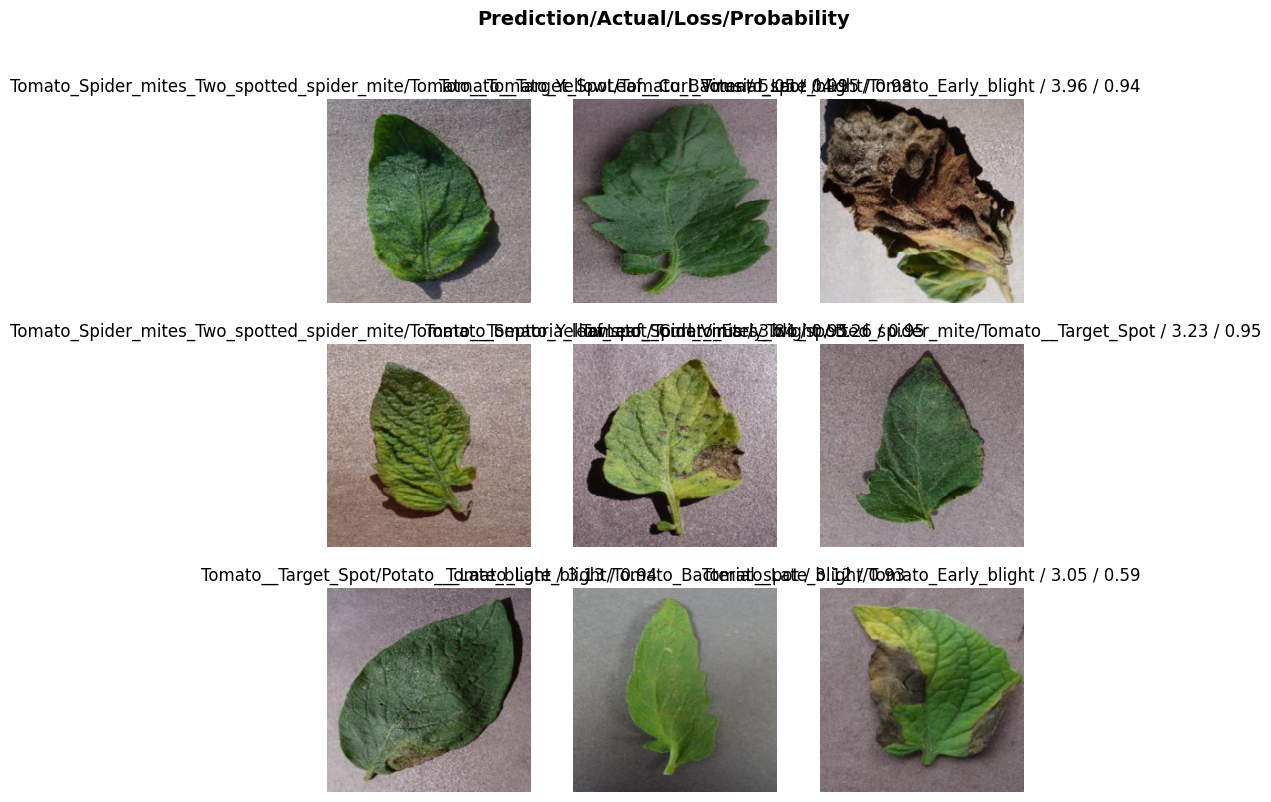

In [ ]:
interp.plot_top_losses(9, figsize=(9,9))

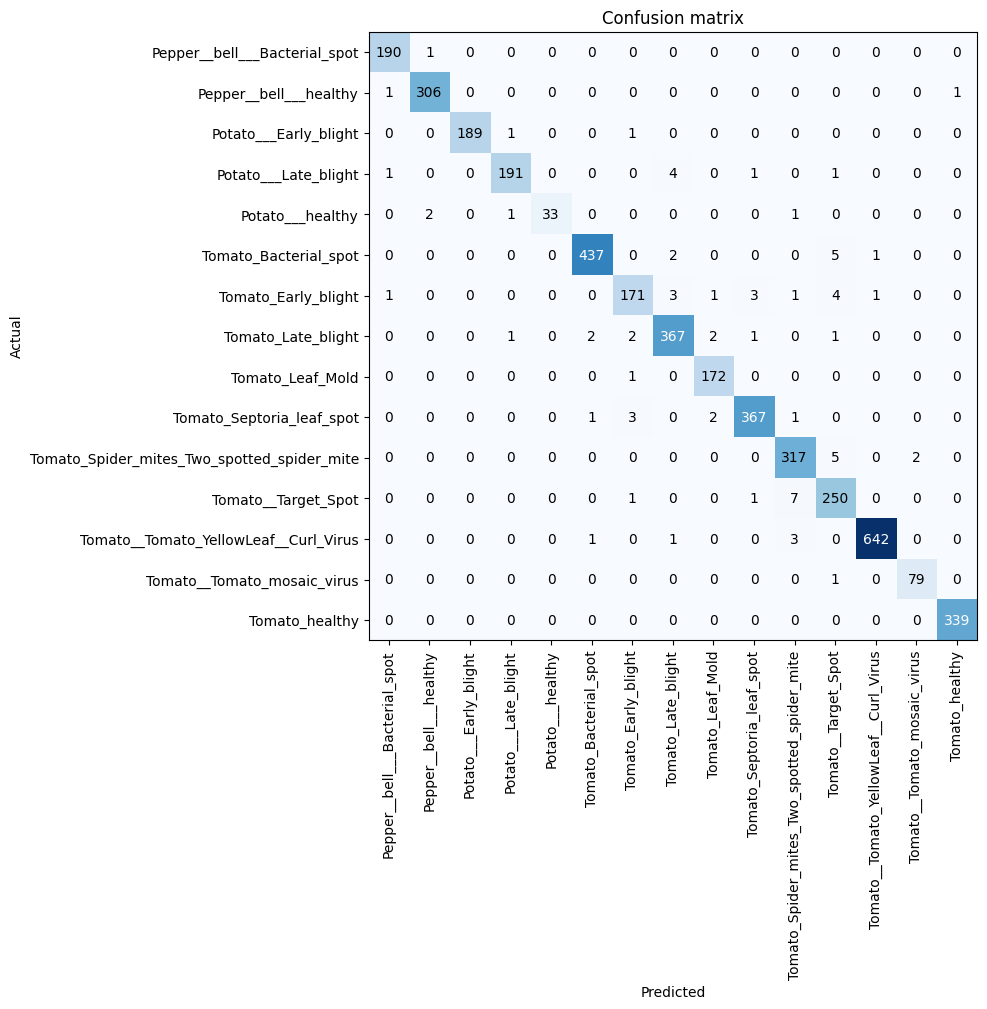

In [ ]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=100)

In [ ]:
learn_resnet50.export("resnet50_best.pkl")

In [ ]:
learn_resnet34 = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 192MB/s]


In [ ]:
learn_resnet34.freeze()

SuggestedLRs(minimum=0.006918309628963471, steep=0.0063095735386013985, valley=0.0020892962347716093, slide=0.00363078061491251)

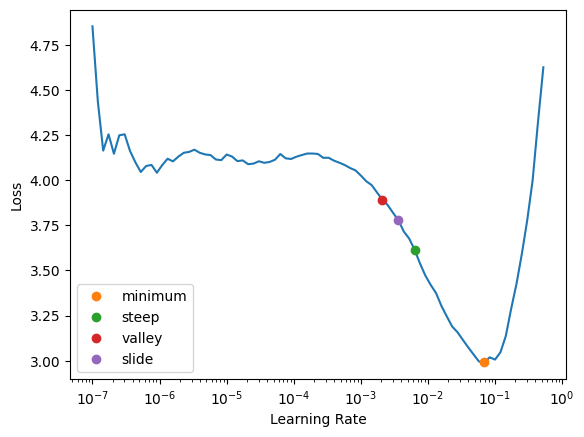

In [ ]:
learn_resnet34.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
learn_resnet34.fit_one_cycle(1, 2.09e-3)

In [ ]:
learn_resnet34.unfreeze()

SuggestedLRs(minimum=6.30957365501672e-06, steep=9.12010818865383e-07, valley=1.737800812406931e-05, slide=5.248074739938602e-05)

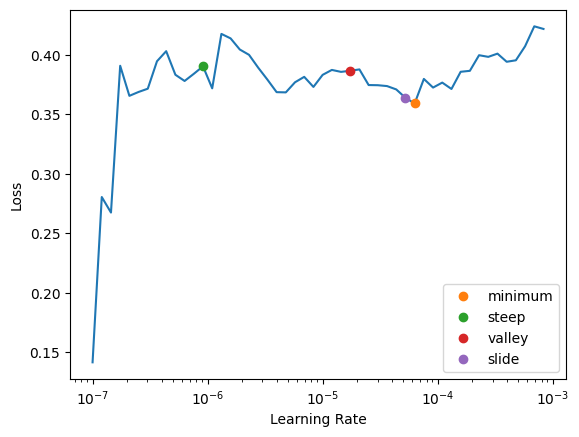

In [ ]:
learn_resnet34.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
learn_resnet34.fit_one_cycle(10, lr_max=slice(1e-6,  1.74e-5))

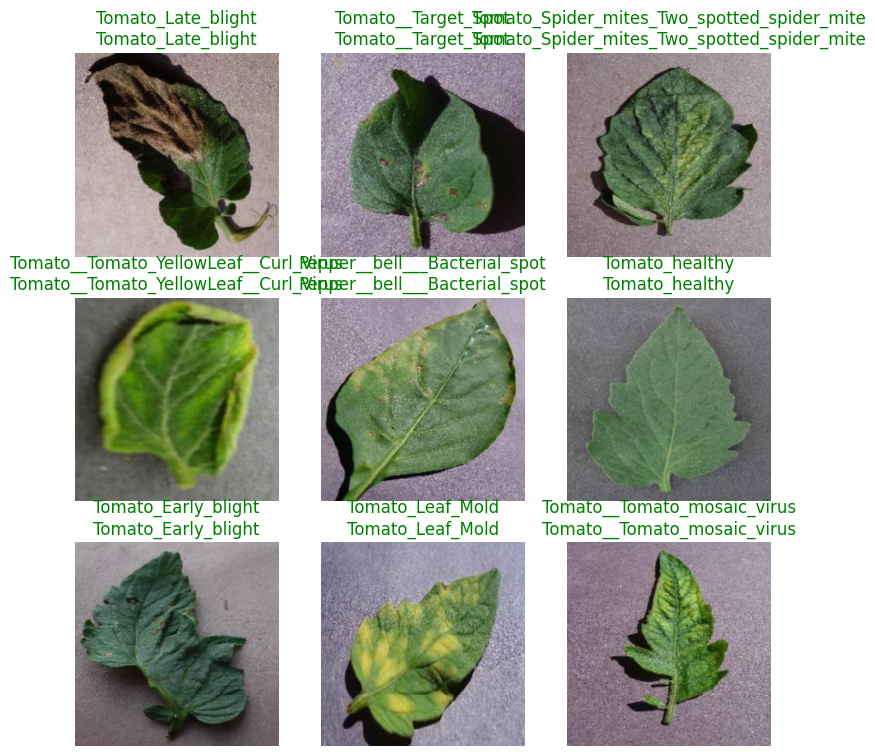

In [ ]:
learn_resnet34.show_results()

In [ ]:
interp2 = ClassificationInterpretation.from_learner(learn_resnet34)

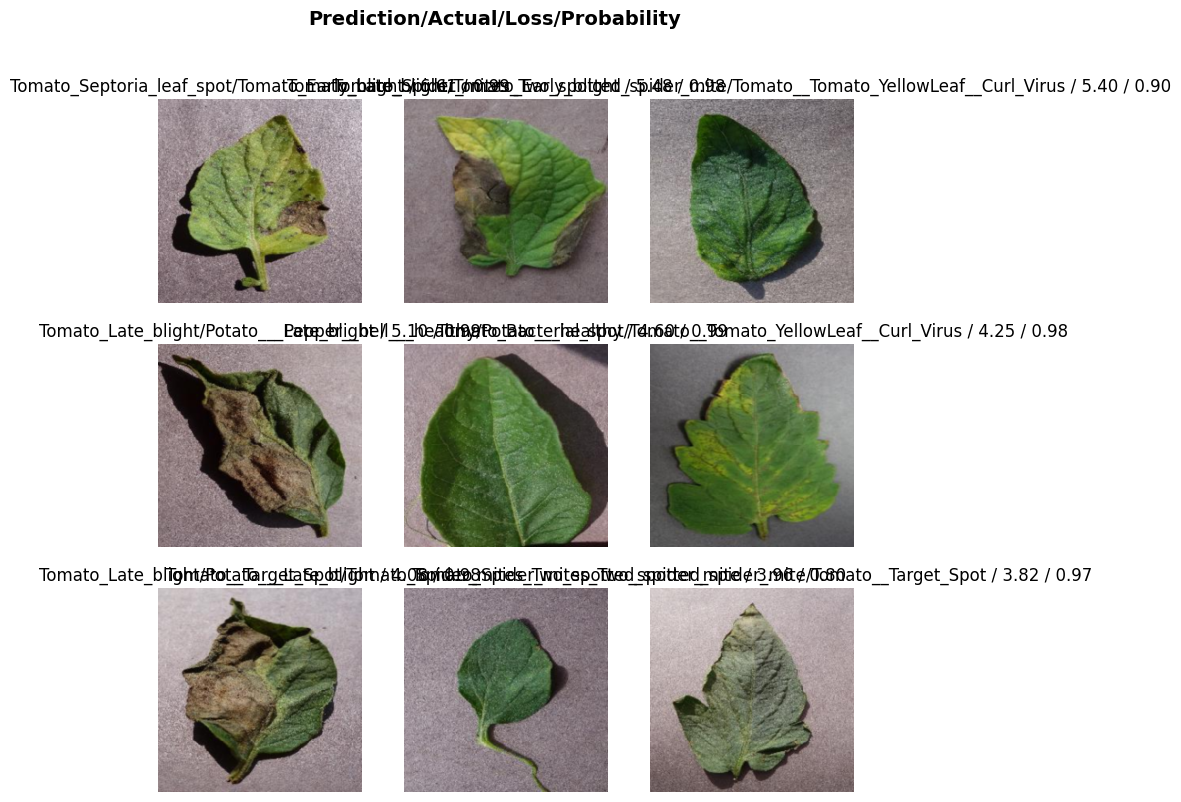

In [ ]:
interp2.plot_top_losses(9, figsize=(9,9))

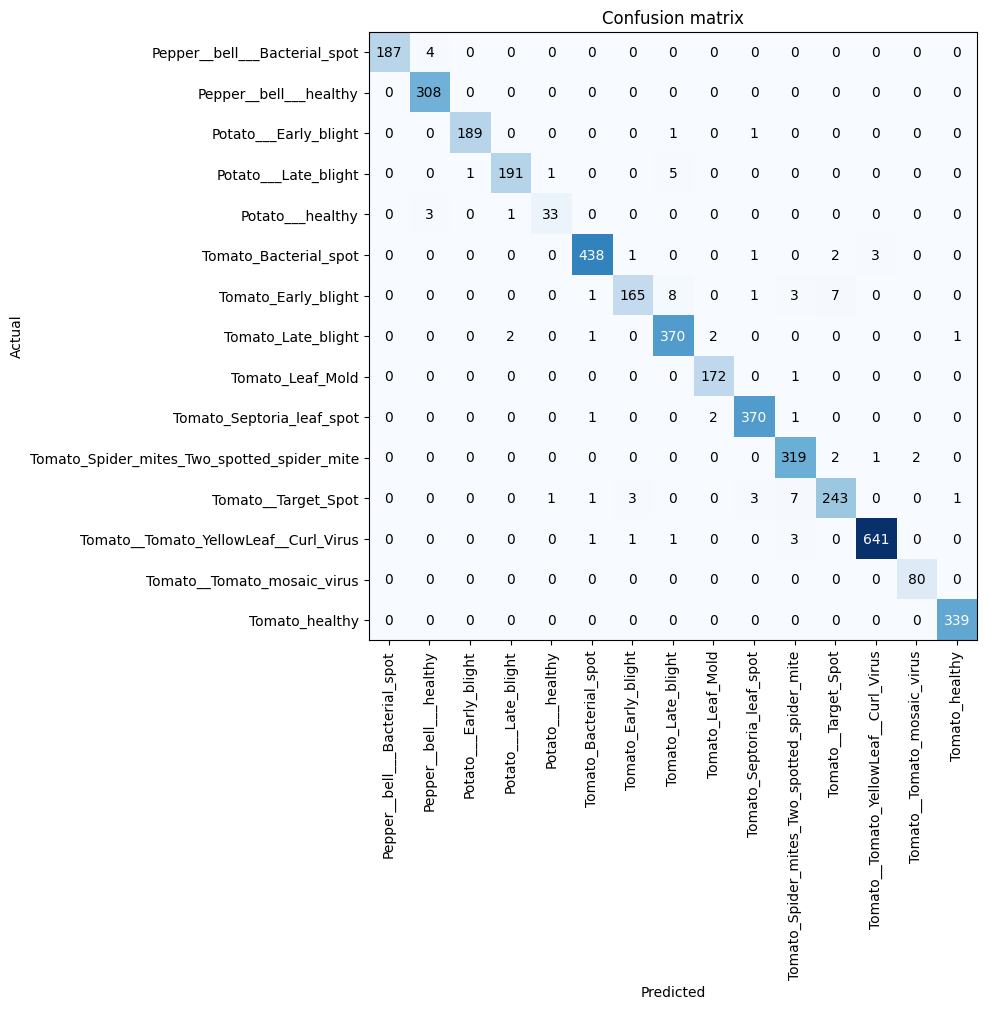

In [ ]:
interp2.plot_confusion_matrix(figsize=(10,10), dpi=100)

In [ ]:
learn_resnet34.export("resnet34_best.pkl")

In [ ]:
learn_effnet = vision_learner(dls, efficientnet_b0, metrics=accuracy)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 117MB/s]


In [ ]:
learn_effnet.freeze()


SuggestedLRs(minimum=0.012022644281387329, steep=0.0020892962347716093, valley=0.0012022644514217973, slide=0.001737800776027143)

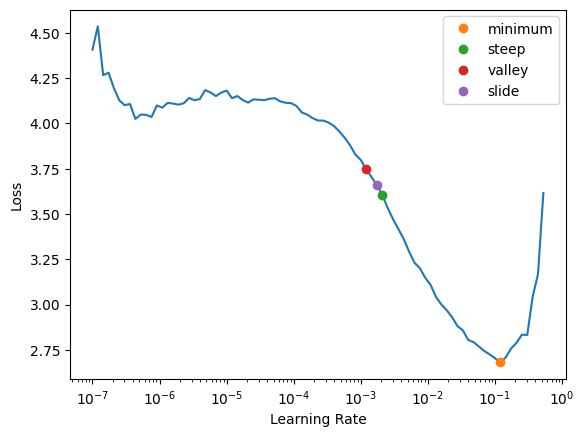

In [ ]:
learn_effnet.lr_find(suggest_funcs=(minimum, steep, valley, slide))


In [ ]:
learn_effnet.fit_one_cycle(1, 1.2e-3)



In [ ]:
learn_effnet.unfreeze()


SuggestedLRs(minimum=1.318256749982538e-07, steep=1.0964781722577754e-06, valley=0.0002290867705596611, slide=0.00019054606673307717)

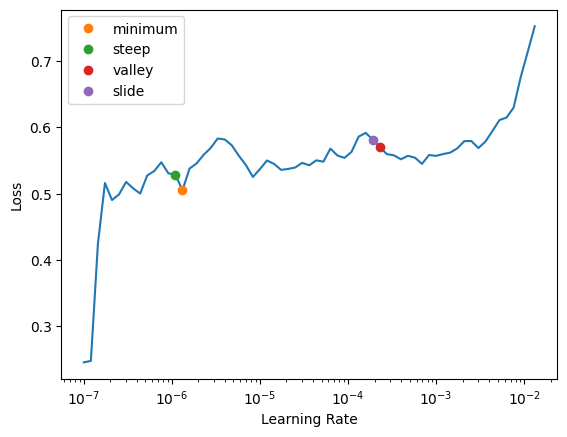

In [ ]:
learn_effnet.lr_find(suggest_funcs=(minimum, steep, valley, slide))


In [ ]:
learn_effnet.fit_one_cycle(10, lr_max=slice(1e-6, 2.29e-4))

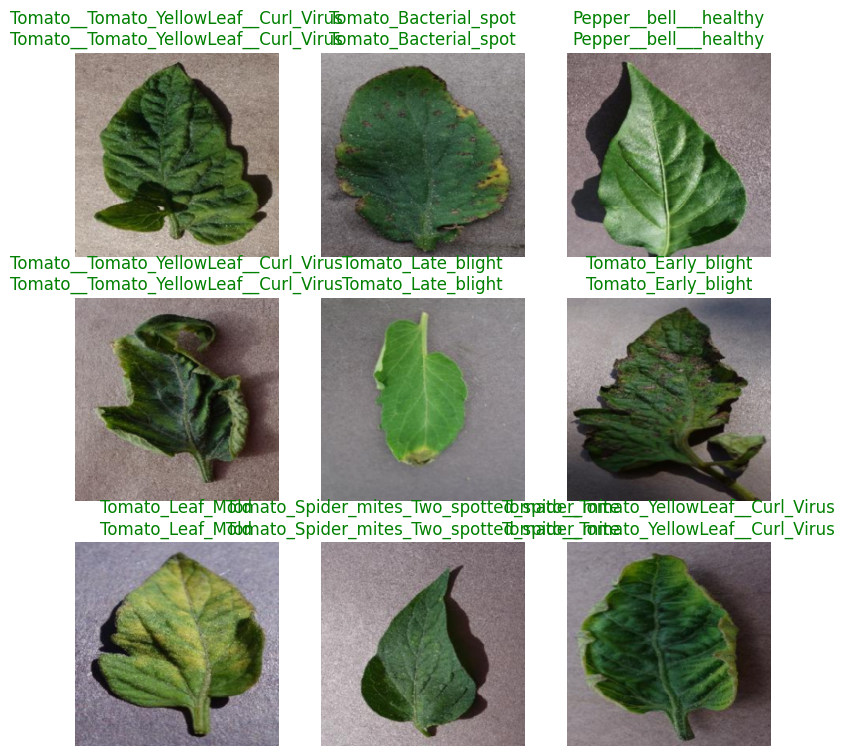

In [ ]:
learn_effnet.show_results()

In [ ]:
interp3 = ClassificationInterpretation.from_learner(learn_effnet)

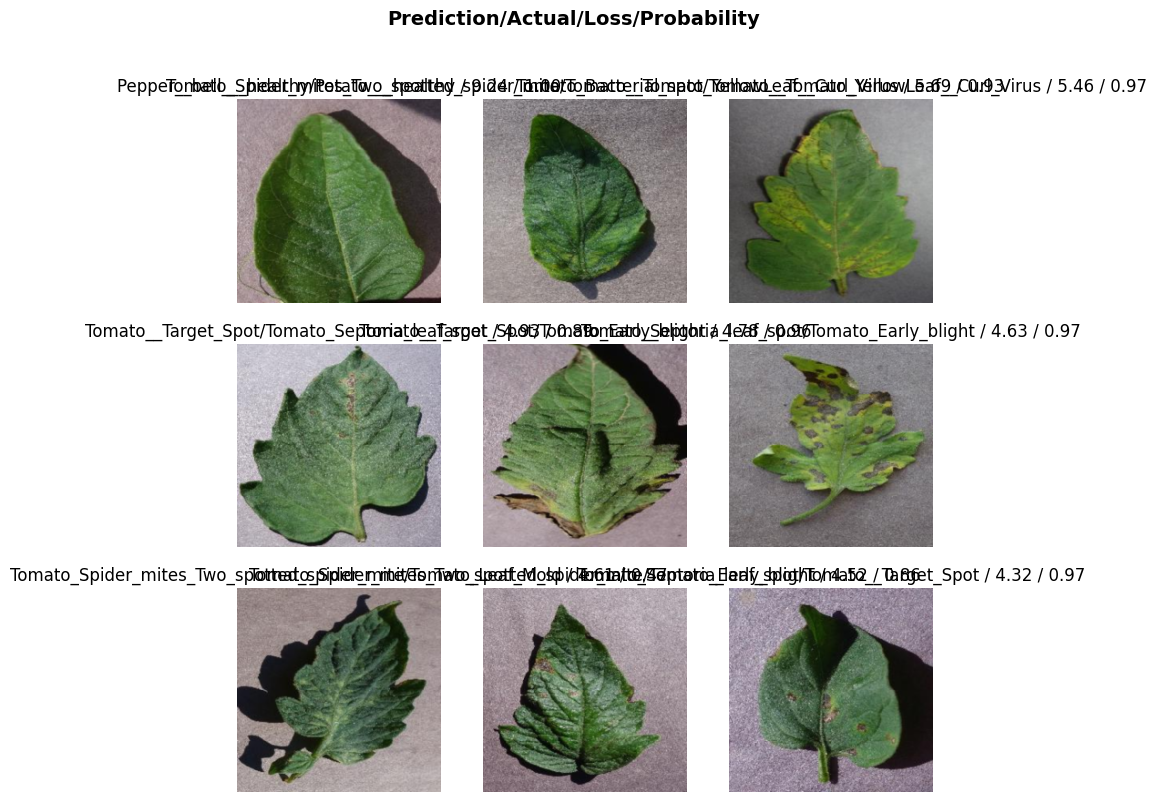

In [ ]:
interp3.plot_top_losses(9, figsize=(9,9))

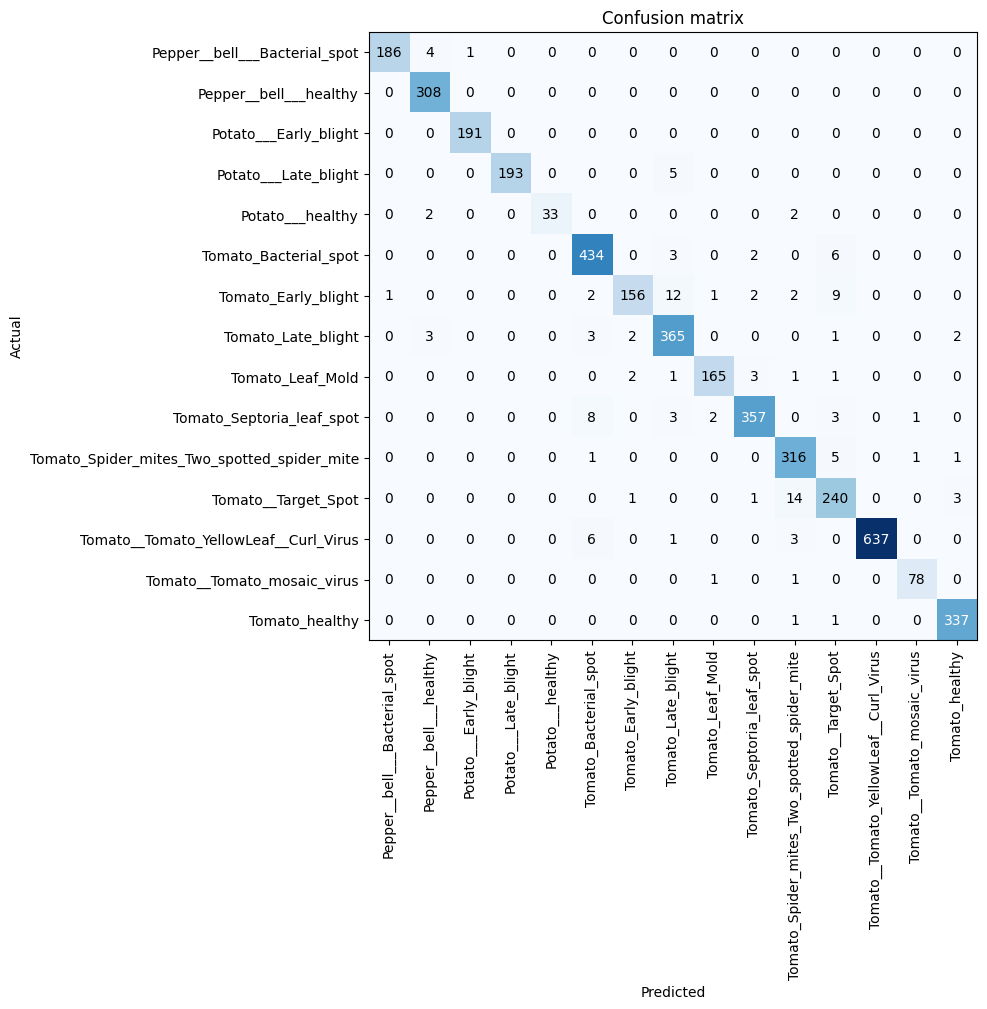

In [ ]:
interp3.plot_confusion_matrix(figsize=(10,10), dpi=100)

In [ ]:
learn_effnet.export("learn_effnet_best.pkl")

In [ ]:
def threshold_on_mixed_data(model, model_name, dls, unknown_path, threshold=0.8, ratio=0.1):
    from random import sample
    print(f"[Threshold Evaluation on Mixed Data - {model_name} | Threshold = {threshold}]")


    val_indices = sample(range(len(dls.valid_ds)), int(len(dls.valid_ds) * ratio))


    unknown_images = get_image_files(unknown_path)
    unknown_sample = sample(unknown_images, min(len(unknown_images), int(len(dls.valid_ds) * ratio * 0.1)))

    correct, total, rejected, unknown_total, unknown_rejected = 0, 0, 0, 0, 0


    for i in val_indices:
        img, label = dls.valid_ds[i]
        pred_class, _, outputs = model.predict(img)
        confidence = outputs.max().item()
        if confidence < threshold:
            rejected += 1
        else:
            total += 1
            if str(pred_class) == dls.vocab[label]:
                correct += 1


    for img_path in unknown_sample:
        try:
            img = PILImage.create(img_path)
            _, _, outputs = model.predict(img)
            confidence = outputs.max().item()
            unknown_total += 1
            if confidence < threshold:
                unknown_rejected += 1
        except Exception as e:
            print(f"⚠️ Error with {img_path.name}: {e}")

    print(f"Known Samples:")
    print(f"  Accepted: {total}, Correct: {correct}, Rejected: {rejected}")
    print(f"  Accuracy on accepted: {(correct / total) * 100:.2f}%")

    print(f"Unknown Samples:")
    print(f"  Rejected: {unknown_rejected}/{unknown_total} → {(unknown_rejected / unknown_total) * 100:.2f}% rejection rate")








In [ ]:
unknown_path= "/content/unknown"

In [ ]:
threshold_on_mixed_data(learn_resnet50, "ResNet50", dls, unknown_path, threshold=0.9)

[Threshold Evaluation on Mixed Data - ResNet50 | Threshold = 0.9]


Known Samples:
  Accepted: 384, Correct: 383, Rejected: 28
  Accuracy on accepted: 99.74%
Unknown Samples:
  Rejected: 29/41 → 70.73% rejection rate


In [ ]:
threshold_on_mixed_data(learn_resnet50, "ResNet50", dls, unknown_path, threshold=0.8)

[Threshold Evaluation on Mixed Data - ResNet50 | Threshold = 0.8]


Known Samples:
  Accepted: 393, Correct: 390, Rejected: 19
  Accuracy on accepted: 99.24%
Unknown Samples:
  Rejected: 25/41 → 60.98% rejection rate


In [ ]:
threshold_on_mixed_data(learn_resnet34, "ResNet34", dls, unknown_path, threshold=0.9)

[Threshold Evaluation on Mixed Data - ResNet34 | Threshold = 0.9]


Known Samples:
  Accepted: 383, Correct: 382, Rejected: 29
  Accuracy on accepted: 99.74%
Unknown Samples:
  Rejected: 26/41 → 63.41% rejection rate


In [ ]:
threshold_on_mixed_data(learn_resnet34, "ResNet34", dls, unknown_path, threshold=0.8)

[Threshold Evaluation on Mixed Data - ResNet34 | Threshold = 0.8]


Known Samples:
  Accepted: 397, Correct: 395, Rejected: 15
  Accuracy on accepted: 99.50%
Unknown Samples:
  Rejected: 20/41 → 48.78% rejection rate


In [ ]:
!pip install gradio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
import gradio as gr
from fastai.vision.all import *


learn = load_learner("resnet50_best.pkl")

def predict(img):
    pred_class, pred_idx, outputs = learn.predict(img)
    confidence = outputs.max().item()
    if confidence < 0.9:
        return "Unknown"
    return pred_class

gr.Interface(fn=predict, inputs=gr.Image(type="pil"), outputs="text", title="Plant Disease Classifier").launch()


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://aa3f25add2362a4a40.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
